In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:/Users/anhj2/Desktop/capstone/배추공급량/배추공급량전처리1.csv")
data

,날짜,도매지역,총거래물량,품종,산지
0,2024-11-18,서울,4875700.00,김장(가을)배추,전남
1,2024-11-18,서울,3197600.00,김장(가을)배추,강원
2,2024-11-18,서울,891936.00,기타배추,전남
3,2024-11-18,서울,689000.00,김장(가을)배추,전북
4,2024-11-18,서울,682100.00,김장(가을)배추,경북
...,...,...,...,...,...
534678,2020-01-02,정읍,4.00,기타배추,광주
534679,2020-01-02,춘천,0.45,기타배추,서울
534680,2020-01-02,춘천,0.20,기타배추,서울
534681,2020-01-02,춘천,0.10,기타배추,서울


## 항목별 결측치 확인

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534683 entries, 0 to 534682
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   날짜      534683 non-null  object 
 1   도매지역    534683 non-null  object 
 2   총거래물량   534520 non-null  float64
 3   품종      534683 non-null  object 
 4   산지      534683 non-null  object 
dtypes: float64(1), object(4)
memory usage: 20.4+ MB


## 전 지역 총거래물량의 이상값 확인

c:\Users\anhj2\anaconda3\envs\demand_forecast\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


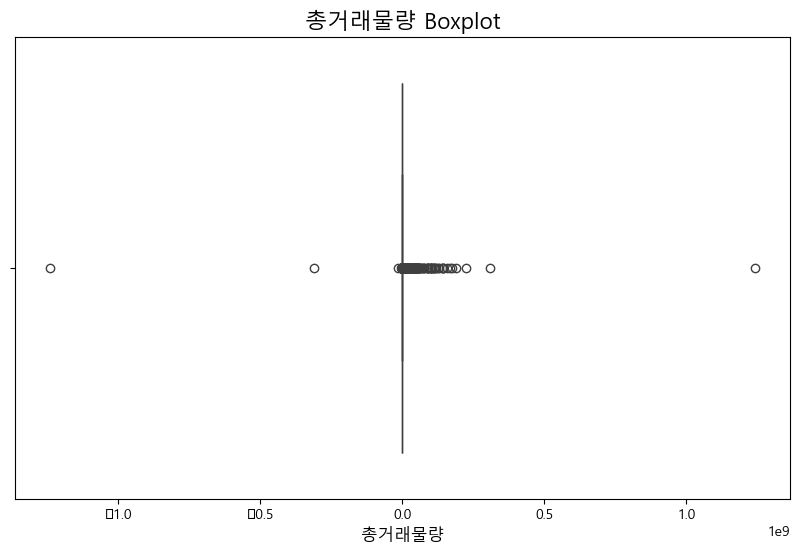

In [12]:
# 한글 폰트 설정 (Windows 환경에서 '맑은 고딕' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["총거래물량"])
plt.title("총거래물량 Boxplot", fontsize=16)
plt.xlabel("총거래물량", fontsize=12)
plt.show()

## 5개 지역 이상값 확인

c:\Users\anhj2\anaconda3\envs\demand_forecast\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


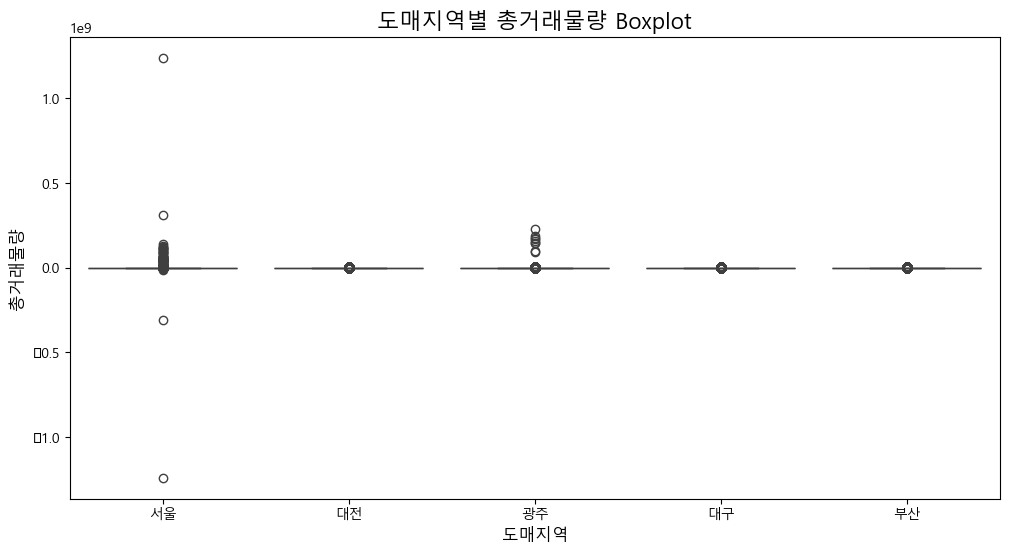

In [13]:
# 도매지역 필터링
target_regions = ["서울", "부산", "대구", "광주", "대전"]
filtered_data = data[data["도매지역"].isin(target_regions)]

# Boxplot 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x="도매지역", y="총거래물량", data=filtered_data)
plt.title("도매지역별 총거래물량 Boxplot", fontsize=16)
plt.xlabel("도매지역", fontsize=12)
plt.ylabel("총거래물량", fontsize=12)
plt.show()

## 지역별 총거래물량이 음수인 행

In [14]:
# 대구
negative_values = data[(data["도매지역"] == "대구") & (data["총거래물량"] < 0)]
print(negative_values)

                날짜 도매지역     총거래물량    품종  산지
258390  2022-08-22   대구    -448.0   쌈배추  강원
265886  2022-07-26   대구   -3840.0   쌈배추  강원
431388  2020-11-30   대구 -221600.0  절임배추  경북


In [15]:
# 부산
negative_values = data[(data["도매지역"] == "부산") & (data["총거래물량"] < 0)]
print(negative_values)

                날짜 도매지역  총거래물량    품종  산지
478463  2020-07-29   부산  -1.47  여름배추  부산


In [16]:
# 서울
negative_values = data[(data["도매지역"] == "서울") & (data["총거래물량"] < 0)]
print(negative_values)

                날짜 도매지역     총거래물량      품종  산지
14654   2024-10-18   서울    -240.0     쌈배추  강원
14655   2024-10-18   서울    -480.0     쌈배추  강원
20174   2024-10-03   서울     -64.0     쌈배추  서울
28790   2024-09-05   서울 -238800.0   고냉지배추  강원
37838   2024-08-05   서울   -8000.0  배추(수입)  인천
...            ...  ...       ...     ...  ..
521978  2020-02-15   서울   -1152.0    기타배추  전남
531161  2020-01-14   서울  -10000.0    월동배추  강원
533059  2020-01-08   서울   -8000.0    월동배추  경북
534211  2020-01-04   서울   -5000.0    월동배추  서울
534212  2020-01-04   서울   -5000.0    월동배추  강원

[99 rows x 5 columns]


In [17]:
# 대전
negative_values = data[(data["도매지역"] == "대전") & (data["총거래물량"] < 0)]
print(negative_values)

                날짜 도매지역     총거래물량    품종  산지
87450   2024-01-24   대전 -100200.0  월동배추  전북
332734  2021-11-15   대전   -2400.0  절임배추  충북


In [18]:
# 광주
negative_values = data[(data["도매지역"] == "광주") & (data["총거래물량"] < 0)]
print(negative_values)

Empty DataFrame
Columns: [날짜, 도매지역, 총거래물량, 품종, 산지]
Index: []


## 이상값 원인 파악(총거래물량이 음수가 나온 이유 찾기)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('C:/Users/anhj2/Desktop/capstone/배추공급량/배추공급량전처리(총거래물량구하기까지).csv')
data

,날짜,거래단위,거래단위별 총거래물량,도매지역,품종,산지,총거래물량
0,2024-11-18,10.0,487570.0,서울,김장(가을)배추,전남,4875700.00
1,2024-11-18,10.0,319760.0,서울,김장(가을)배추,강원,3197600.00
2,2024-11-18,12.0,74328.0,서울,기타배추,전남,891936.00
3,2024-11-18,10.0,68900.0,서울,김장(가을)배추,전북,689000.00
4,2024-11-18,10.0,68210.0,서울,김장(가을)배추,경북,682100.00
...,...,...,...,...,...,...,...
534678,2020-01-02,2.0,2.0,정읍,기타배추,광주,4.00
534679,2020-01-02,0.3,1.5,춘천,기타배추,서울,0.45
534680,2020-01-02,0.2,1.0,춘천,기타배추,서울,0.20
534681,2020-01-02,0.1,1.0,춘천,기타배추,서울,0.10


In [20]:
# 서울
negative_values = data[(data["도매지역"] == "서울") & (data["거래단위별 총거래물량"] < 0)]
negative_values

,날짜,거래단위,거래단위별 총거래물량,도매지역,품종,산지,총거래물량
14654,2024-10-18,4.0,-60.0,서울,쌈배추,강원,-240.0
14655,2024-10-18,4.0,-120.0,서울,쌈배추,강원,-480.0
20174,2024-10-03,8.0,-8.0,서울,쌈배추,서울,-64.0
28790,2024-09-05,20.0,-11940.0,서울,고냉지배추,강원,-238800.0
37838,2024-08-05,10.0,-800.0,서울,배추(수입),인천,-8000.0
...,...,...,...,...,...,...,...
521978,2020-02-15,12.0,-96.0,서울,기타배추,전남,-1152.0
531161,2020-01-14,10.0,-1000.0,서울,월동배추,강원,-10000.0
533059,2020-01-08,10.0,-800.0,서울,월동배추,경북,-8000.0
534211,2020-01-04,10.0,-500.0,서울,월동배추,서울,-5000.0


In [21]:
# 부산
negative_values = data[(data["도매지역"] == "부산") & (data["거래단위별 총거래물량"] < 0)]
negative_values

,날짜,거래단위,거래단위별 총거래물량,도매지역,품종,산지,총거래물량
478463,2020-07-29,0.7,-2.1,부산,여름배추,부산,-1.47


In [22]:
# 대구
negative_values = data[(data["도매지역"] == "대구") & (data["거래단위별 총거래물량"] < 0)]
negative_values

,날짜,거래단위,거래단위별 총거래물량,도매지역,품종,산지,총거래물량
258390,2022-08-22,8.0,-56.0,대구,쌈배추,강원,-448.0
265886,2022-07-26,8.0,-480.0,대구,쌈배추,강원,-3840.0
431388,2020-11-30,20.0,-11080.0,대구,절임배추,경북,-221600.0


In [23]:
# 대전
negative_values = data[(data["도매지역"] == "대전") & (data["거래단위별 총거래물량"] < 0)]
negative_values

,날짜,거래단위,거래단위별 총거래물량,도매지역,품종,산지,총거래물량
87450,2024-01-24,10.0,-10020.0,대전,월동배추,전북,-100200.0
332734,2021-11-15,20.0,-120.0,대전,절임배추,충북,-2400.0


In [24]:
# 광주
negative_values = data[(data["도매지역"] == "광주") & (data["거래단위별 총거래물량"] < 0)]
negative_values

,날짜,거래단위,거래단위별 총거래물량,도매지역,품종,산지,총거래물량


#### 이상값 해결
총거래물량을 거래단위*거래단위별 총거래물량으로 구했는데 일부 지역에 거래단위별 총거래물량에 음수값이 있었음.
따라서 공급량 예측을 위해 청거래물량과 기상을 합친 파일에서 총거래물량의 음수값을 절대값처리해서 이상값을 해결함.